# KNN 모델

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings('ignore')

In [6]:
dataset = load_iris()
data = pd.DataFrame(dataset.data, columns = dataset.feature_names)
X_train, X_test, y_train, y_test = train_test_split(data, dataset.target, random_state = 42)
y_train_scaled = y_train

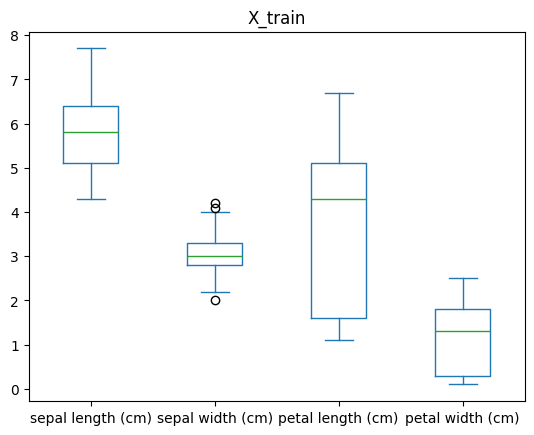

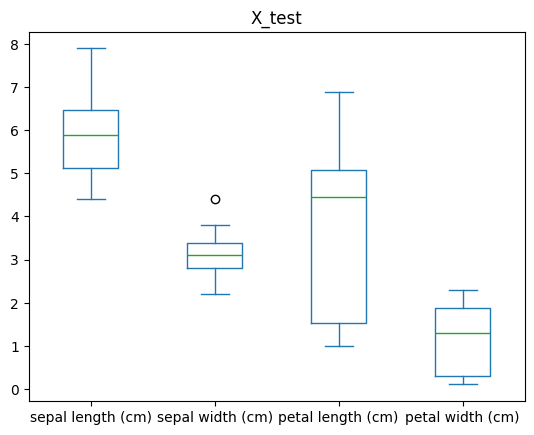

In [10]:
X_train.plot(kind = 'box')
plt.title('X_train')
plt.show()
X_test.plot(kind = 'box')
plt.title('X_test')
plt.show()

## 스케일러 적용

In [13]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_scaled = mms.fit_transform(X_train)
X_test_scaled = mms.fit_transform(X_test)
print('X_train_scaled : ', X_train_scaled)
print('X_test_scaled : ', X_test_scaled)

X_train_scaled :  [[0.20588235 0.72727273 0.05357143 0.04166667]
 [0.26470588 0.95454545 0.07142857 0.        ]
 [0.44117647 0.31818182 0.71428571 0.75      ]
 [0.5        0.63636364 0.60714286 0.625     ]
 [0.70588235 0.5        0.64285714 0.58333333]
 [0.32352941 0.86363636 0.03571429 0.125     ]
 [0.32352941 0.77272727 0.07142857 0.04166667]
 [0.35294118 0.18181818 0.46428571 0.375     ]
 [0.58823529 0.36363636 0.71428571 0.58333333]
 [0.61764706 0.5        0.78571429 0.70833333]
 [0.67647059 0.45454545 0.58928571 0.54166667]
 [0.85294118 0.72727273 0.89285714 1.        ]
 [0.41176471 0.40909091 0.55357143 0.5       ]
 [0.97058824 0.45454545 0.98214286 0.83333333]
 [0.38235294 0.45454545 0.60714286 0.58333333]
 [0.23529412 0.68181818 0.05357143 0.04166667]
 [1.         0.36363636 1.         0.79166667]
 [0.44117647 0.31818182 0.53571429 0.375     ]
 [0.26470588 0.63636364 0.05357143 0.04166667]
 [0.20588235 0.68181818 0.03571429 0.08333333]
 [0.23529412 0.81818182 0.14285714 0.125  

## KNN 모델 생성

In [14]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 11)
model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [15]:
from sklearn.metrics import accuracy_score

pred = model.predict(X_test_scaled)
accuracy_score(y_test, pred)

1.0

In [19]:
from sklearn.model_selection import GridSearchCV, KFold

knn_model = KNeighborsClassifier()
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)
parameters = {
    'n_neighbors' : [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'metric' : ['minkowski'],
    'p' : [1, 2]
    # 'weights' : ['uniform', 'distance'],
    # 'algorithm' : ['ball_tree', 'kd_tree', '']
}

model = GridSearchCV(estimator = knn_model,
                     param_grid = parameters,
                     cv = cv, verbose = 1,
                     n_jobs = 1, refit = True)

model.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'metric': ['minkowski'],
                         'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'p': [1, 2]},
             verbose=1)

In [21]:
print('Best Estimator:\n', model.best_estimator_);print()
print('Best Params:\n', model.best_params_);print()
print('Best Score:\n', model.best_score_);print();

Best Estimator:
 KNeighborsClassifier(n_neighbors=4)

Best Params:
 {'metric': 'minkowski', 'n_neighbors': 4, 'p': 2}

Best Score:
 0.9549407114624507



# 농국선수 포지션 예측

In [23]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [24]:
train = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/wikibook/machine-learning/2.0/data/csv/basketball_test.csv")

In [28]:
print(train)
print('------------------------------------------------------')
print(test)

                 Player Pos   3P  TRB  BLK
0      Denzel Valentine  SG  1.3  2.6  0.1
1           Kyle Korver  SG  2.4  2.8  0.3
2          Troy Daniels  SG  2.1  1.5  0.1
3          Tim Hardaway  SG  1.9  2.8  0.2
4        Dewayne Dedmon   C  0.0  6.5  0.8
..                  ...  ..  ...  ...  ...
75       Victor Oladipo  SG  1.9  4.3  0.3
76  Willie Cauley-Stein   C  0.0  4.5  0.6
77          Brook Lopez   C  1.8  5.4  1.7
78      Josh Richardson  SG  1.4  3.2  0.7
79         Lou Williams  SG  2.0  2.5  0.2

[80 rows x 5 columns]
------------------------------------------------------
                  Player Pos   3P   TRB  BLK
0           JaVale McGee   C  0.0   3.2  0.9
1          Manu Ginobili  SG  1.3   2.3  0.2
2           Nene Hilario   C  0.0   4.2  0.6
3          Evan Fournier  SG  1.9   3.1  0.1
4   Georgios Papagiannis   C  0.0   3.9  0.8
5          Anthony Davis   C  0.5  11.8  2.2
6            Tarik Black   C  0.0   5.1  0.7
7         Jamal Crawford  SG  1.4   1.6  0.2
8

## k를 직접 구하는 과정

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

max_k_range = train.shape[0] // 2
max_k_range

40

In [34]:
k_list = []

for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [38]:
cross_validation_scores = []
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(),
                            cv = 10, scoring = 'accuracy')
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[np.float64(0.8875),
 np.float64(0.875),
 np.float64(0.875),
 np.float64(0.8625),
 np.float64(0.875),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.875),
 np.float64(0.875),
 np.float64(0.875),
 np.float64(0.8625),
 np.float64(0.8625),
 np.float64(0.85),
 np.float64(0.85),
 np.float64(0.825),
 np.float64(0.8),
 np.float64(0.8)]

Text(0, 0.5, 'Accuracy')

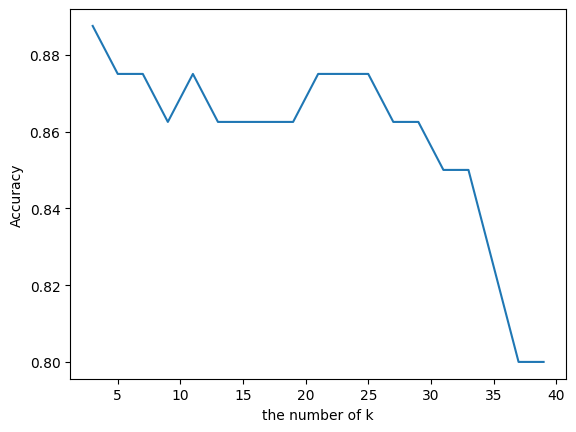

In [39]:
plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')

In [40]:
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print('The best number of k : ' + str(k))

The best number of k : 3


In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors = k)

In [47]:
knn.fit(x_train, y_train)

C:\Project\Python_Source\.venv\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [48]:
x_test = test[['3P', 'BLK', 'TRB']]
y_test = test['Pos']

In [49]:
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'SG', 'C'], dtype=object)

In [50]:
y_test.values

array([['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['C'],
       ['C'],
       ['SG'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C'],
       ['C'],
       ['SG'],
       ['SG'],
       ['C'],
       ['SG'],
       ['C']], dtype=object)

In [57]:
comparison = pd.DataFrame({'prediction':pred, 'ground_truth':y_test})
comparison

,prediction,ground_truth
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,C
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,C,C


In [58]:
print('accuracy : ' + str(accuracy_score(y_test, pred)))

accuracy : 0.95


# knn 모델을 회귀모델로 사용하는 예시

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor # knn 모델을 회귀모델 변화한 모듈
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name = 'Boston', version = 1, as_frame = True)
X = boston.data
y = boston.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


In [5]:
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [6]:
k = 3
knn_regressor = KNeighborsRegressor(n_neighbors = k)
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)

In [8]:
print('Mean Squared Error : ', mean_squared_error(y_test, y_pred))
print('R-squared : ', r2_score(y_test, y_pred))

Mean Squared Error :  21.65955337690632
R-squared :  0.7046442656646525


# 의사 결정 트리(분류 모델로 많이 사용됨)

In [9]:
import seaborn as sns

data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [11]:
prep_data = data.drop(columns = ['alive', 'who', 'adult_male', 'class', 'embark_town'])
prep_data.drop('deck', axis = 1, inplace = True)
prep_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


#### 결측값 제거 방법 dropna

In [21]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5, 4), columns = ['C1', 'C2', 'C3', 'C4'])
df.loc[[0, 1], 'C1'] = None
df.loc[2, 'C2'] = np.nan
df.loc[1, 'C3'] = np.nan
df

,C1,C2,C3,C4
0,NaN,0.838813,-0.601500,-1.628958
1,NaN,0.471229,NaN,1.207794
2,0.150062,NaN,-1.705301,0.878178
3,1.008031,1.976229,-0.599346,-0.065949
4,0.611075,0.291843,0.240139,1.065237


In [22]:
df_dop_row = df.dropna(axis = 0)
df_dop_row

,C1,C2,C3,C4
3,1.008031,1.976229,-0.599346,-0.065949
4,0.611075,0.291843,0.240139,1.065237


In [23]:
df_dop_col = df.dropna(axis = 1) # 열을 기준으로 제거
df_dop_col

,C4
0,-1.628958
1,1.207794
2,0.878178
3,-0.065949
4,1.065237


In [26]:
df_dop_row_thresh = df.dropna(thresh = 4) # thresh = 4 데이터가 4개인거 제외하고 다 제거
df_dop_row_thresh

,C1,C2,C3,C4
3,1.008031,1.976229,-0.599346,-0.065949
4,0.611075,0.291843,0.240139,1.065237


In [39]:
pred_data = prep_data.dropna().reset_index(drop = True)
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    int64  
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 45.3+ KB


## 인코딩 작업

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
pred_data['sex'] = le.fit_transform(pred_data['sex'])
print(le.classes_)
pred_data.tail()

[0 1]


,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
707,0,3,0,39.0,0,5,29.125,Q,False
708,0,2,1,27.0,0,0,13.000,S,True
709,1,1,0,19.0,0,0,30.000,S,True
710,1,1,1,26.0,0,0,30.000,C,True
711,0,3,1,32.0,0,0,7.750,Q,True


In [41]:
from sklearn.preprocessing import OneHotEncoder

embarked_unique = prep_data.embarked.unique()
print('embarked 열의 고유한 값 : \n', embarked_unique)

embarked 열의 고유한 값 : 
 ['S' 'C' 'Q']


In [42]:
embarked_df= pred_data[["embarked"]]
embarked_df.head()

,embarked
0,S
1,C
2,S
3,S
4,S


In [32]:
res1 = pd.get_dummies(embarked_df)
res1

,embarked_C,embarked_Q,embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
707,False,True,False
708,False,False,True
709,False,False,True
710,True,False,False


In [44]:
pred_data2 = pd.concat([pred_data, res1], axis = 1)
pred_data2 = pred_data2.drop('embarked', axis = 1)
pred_data2

,survived,pclass,sex,age,sibsp,parch,fare,alone,embarked_C,embarked_Q,embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,True,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,False,False,True,False
708,0,2,1,27.0,0,0,13.0000,True,False,False,True
709,1,1,0,19.0,0,0,30.0000,True,False,False,True
710,1,1,1,26.0,0,0,30.0000,True,True,False,False


#### OneHotEncoder 활용하여 enbarked 컬럼 인코딩

In [45]:
ohe = OneHotEncoder()
ohe.fit(embarked_df)
embarked_ohe = ohe.transform(embarked_df)
print(embarked_ohe)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 712 stored elements and shape (712, 3)>
  Coords	Values
  (0, 2)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 2)	1.0
  (4, 2)	1.0
  (5, 2)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
  (8, 0)	1.0
  (9, 2)	1.0
  (10, 2)	1.0
  (11, 2)	1.0
  (12, 2)	1.0
  (13, 2)	1.0
  (14, 2)	1.0
  (15, 1)	1.0
  (16, 2)	1.0
  (17, 2)	1.0
  (18, 2)	1.0
  (19, 1)	1.0
  (20, 2)	1.0
  (21, 2)	1.0
  (22, 2)	1.0
  (23, 2)	1.0
  (24, 0)	1.0
  :	:
  (687, 2)	1.0
  (688, 2)	1.0
  (689, 2)	1.0
  (690, 0)	1.0
  (691, 2)	1.0
  (692, 2)	1.0
  (693, 2)	1.0
  (694, 2)	1.0
  (695, 2)	1.0
  (696, 2)	1.0
  (697, 0)	1.0
  (698, 0)	1.0
  (699, 2)	1.0
  (700, 2)	1.0
  (701, 0)	1.0
  (702, 2)	1.0
  (703, 2)	1.0
  (704, 2)	1.0
  (705, 2)	1.0
  (706, 2)	1.0
  (707, 1)	1.0
  (708, 2)	1.0
  (709, 2)	1.0
  (710, 0)	1.0
  (711, 1)	1.0


In [46]:
import pandas as pd

embarked_df = pd.DataFrame(embarked_ohe.toarray(), columns = ['C', 'Q', 'S']) # 원핫인코딩 이후toarray를 통해 numpy로 변경해줘야됨
print(embarked_df)
embarked_df.sample(5)

       C    Q    S
0    0.0  0.0  1.0
1    1.0  0.0  0.0
2    0.0  0.0  1.0
3    0.0  0.0  1.0
4    0.0  0.0  1.0
..   ...  ...  ...
707  0.0  1.0  0.0
708  0.0  0.0  1.0
709  0.0  0.0  1.0
710  1.0  0.0  0.0
711  0.0  1.0  0.0

[712 rows x 3 columns]


,C,Q,S
105,0.0,0.0,1.0
595,0.0,1.0,0.0
262,0.0,0.0,1.0
378,0.0,0.0,1.0
182,0.0,0.0,1.0


In [47]:
prep_data = pd.concat([pred_data, embarked_df], axis = 1)
prep_data = prep_data.drop('embarked', axis = 1)
prep_data

,survived,pclass,sex,age,sibsp,parch,fare,alone,C,Q,S
0,0,3,1,22.0,1,0,7.2500,False,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,False,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,True,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,False,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,True,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
707,0,3,0,39.0,0,5,29.1250,False,0.0,1.0,0.0
708,0,2,1,27.0,0,0,13.0000,True,0.0,0.0,1.0
709,1,1,0,19.0,0,0,30.0000,True,0.0,0.0,1.0
710,1,1,1,26.0,0,0,30.0000,True,1.0,0.0,0.0


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(prep_data.iloc[:, 1:],
                                                    prep_data.iloc[:, 0], random_state = 42)

#### Class DecisionTreeClassifier의 Parameters
- criterion : "gini"와 "entropy" 총 두 가지가 있으며, 기본 값은 gini이다.
    - gini”는 “entropy”보다 연산속도는 빠르지만 한쪽으로 편향된 결과를 낼 수 있다.
    - entropy”는 “gini”에 비해 조금 더 균형 잡힌 model을 만들 수 있다고 한다.
- max_depth : Decision Tree의 최대 깊이 제한. default=None. 클수록 정확하게 (과대적합) 작을수록 가지치기 (과대적합 방지)
- min_samples_split : 노드에서 가지를 분리할 때 필요한 최소 sample 개수에 대한 제한.default = 2. 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)
- min_samples_leaf : 한 노드에서 가지고 있어야 할 최소 sample 개수에 대한 제한.default = 1. 클수록 가지치기 (과대적합 방지) 작을수록 정확하게 (과대적합)
    - int일 경우, 주어진 값을 그대로 사용.
    - float일 경우, 0에서 1사이의 값을 줄 수 있으며 ceil(전체 데이터 수*min_samples_leaf)의 값을 사용
- max_features :  최상의 분할을 찾기 위한 feature의 수. default=None
    - int일 경우, 주어진 값을 그대로 사용한다.
    - float일 경우, int(max_features * 총 변수 개수)를 사용한다.
    - None일 경우, 총 변수 개수를 사용한다.
- max_leaf_nodes : int or None, optional (default=None). 최대 몇개 잎 노드가 만들어 질때 까지 split(하위 (잎) 노드로 분리) 할 것이냐를 결정한다.클수록 과대적합이 발생하고 작으면 가지치기 효과를 준다.
- min_impurity_decrease : 분할로 얻어질 분순도 감소량 지정
- min_weight_fraction_leaf: min_samples_leaf와 비슷하지만 가중치가 부여된 전체 샘플 수에서의 비율
- splitter : 각 노드에서 분할을 선택하는 데 사용되는 전략 (default : best)
- class_weight : 클래스 가중치
- presort : 데이터 정렬 필요 여부

In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [55]:
score = model.score(X_test, y_test)
print('정확도 : ', score)

정확도 :  0.7584269662921348


In [57]:
import numpy as np
import matplotlib.pyplot as plt

print('피처 중요도 :\n', model.feature_importances_)

피처 중요도 :
 [0.29899614 0.70100386 0.         0.         0.         0.
 0.         0.         0.         0.        ]


(-1.0, 10.0)

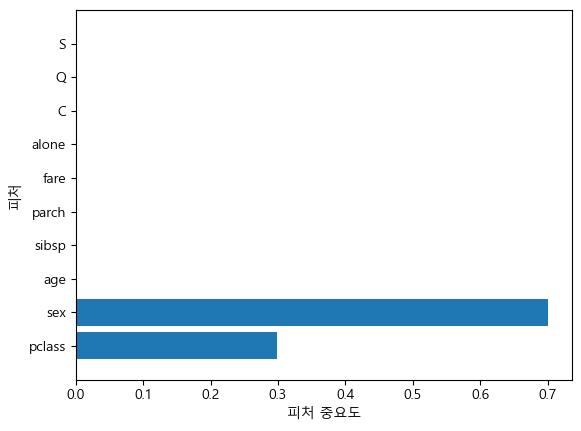

In [58]:
plt.rcParams['font.family']  = 'Malgun Gothic'
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel('피처 중요도')
plt.ylabel('피처')
plt.ylim(-1, n_features)

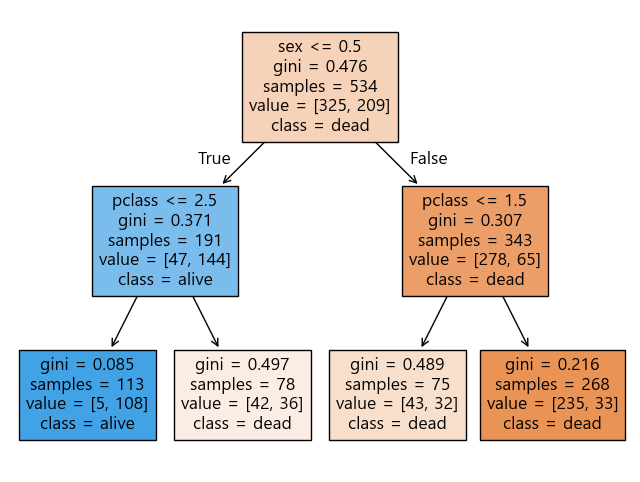

In [59]:
from sklearn.tree import plot_tree
label_val = {0: 'dead', 1: 'alive'}

plt.figure(figsize = (8, 6))
plot_tree(model.fit(X_train, y_train), feature_names = X_train.columns,
          class_names = label_val, filled = True)
plt.show()

In [60]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [61]:
score = model.score(X_test, y_test)
print('정확도 : ', score)

정확도 :  0.7191011235955056


In [62]:
import numpy as np
import matplotlib.pyplot as plt

print('피처 중요도 :\n', model.feature_importances_)

피처 중요도 :
 [0.25751442 0.60374894 0.10730666 0.         0.         0.03142998
 0.         0.         0.         0.        ]


(-1.0, 10.0)

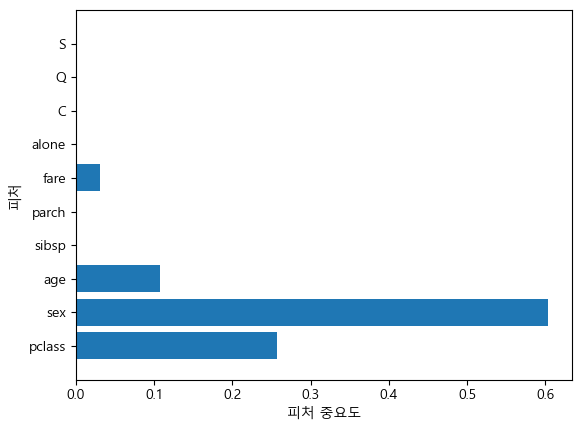

In [63]:
plt.rcParams['font.family']  = 'Malgun Gothic'
n_features = X_train.shape[1]
plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel('피처 중요도')
plt.ylabel('피처')
plt.ylim(-1, n_features)

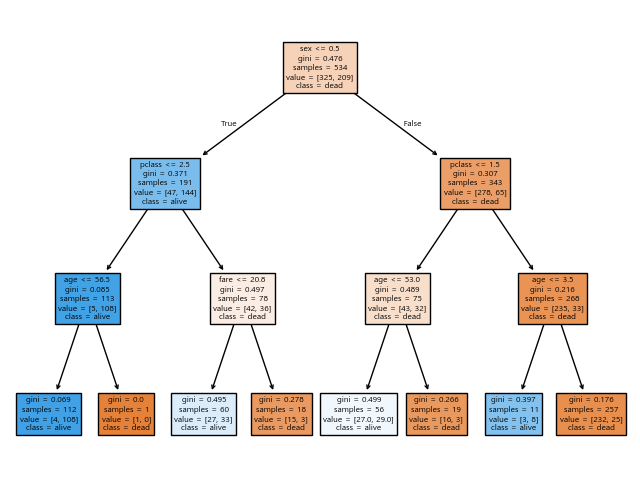

In [64]:
from sklearn.tree import plot_tree
label_val = {0: 'dead', 1: 'alive'}

plt.figure(figsize = (8, 6))
plot_tree(model.fit(X_train, y_train), feature_names = X_train.columns,
          class_names = label_val, filled = True)
plt.show()

In [71]:
from sklearn.model_selection import GridSearchCV, KFold

estimator = DecisionTreeClassifier()
cv = KFold(n_splits=5, random_state=42, shuffle=True)

parameters = {'criterion' : ['gini', 'entropy'],
            'max_depth' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'min_samples_split' : [2, 4, 6, 8, 10, 12, 14, 16],
            'max_leaf_nodes' : [1, 2, 3, 4, 5, 6, 7, 8, 9],
            'random_state' : [7, 23, 42, 78]}

model = GridSearchCV(estimator = estimator,
                    param_grid = parameters,
                    cv = cv, verbose = 1,
                    n_jobs = -1, refit = True) # -1 현재 시스템에서 병렬개수를 최대한 사용하겠다

model.fit(X_train, y_train)

Fitting 5 folds for each of 5760 candidates, totalling 28800 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14, 16],
                         'random_state': [7, 23, 42, 78]},
             verbose=1)

In [72]:
import warnings
warnings.filterwarnings(action='ignore')

print("Best Estimator:\n", model.best_estimator_);print()
print("Best Params:\n", model.best_params_);print()
print("Best Score:\n", model.best_score_);print()

Best Estimator:
 DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=7,
                       random_state=7)

Best Params:
 {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2, 'random_state': 7}

Best Score:
 0.8258860871098571



In [73]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [74]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [75]:
train_df.label.value_counts()

label
Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: count, dtype: int64

In [76]:
test_df.label.value_counts()

label
Gangseo     5
Gangnam     5
Gangbuk     5
Gangdong    5
Name: count, dtype: int64

In [77]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


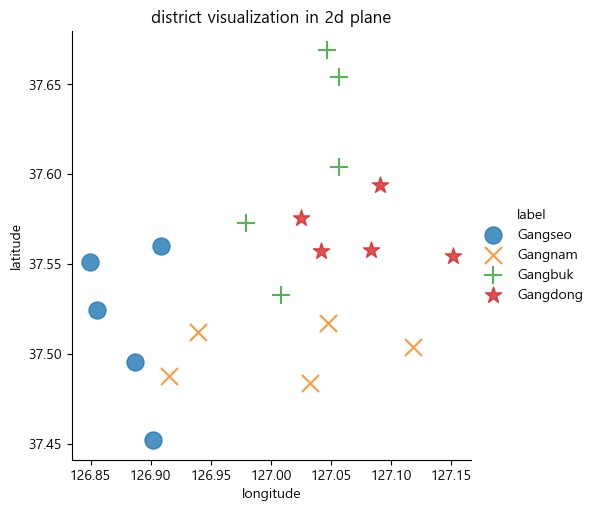

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x = 'longitude', y = 'latitude', data = train_df, fit_reg = False,
           scatter_kws = {'s' : 150}, markers = ['o', 'x', '+', '*'], hue = 'label')
plt.title('district visualization in 2d plane')
plt.show()

In [80]:
train_df.drop(['district'], axis = 1, inplace = True)
test_df.drop(['dong'], axis = 1, inplace = True)

X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]

In [96]:
def display_decision_surface(clf,X,y):
    x_min=X.longitude.min() - 0.01
    x_max = X.longitude.max() +0.01
    y_min=X.latitude.min() - 0.01
    y_max = X.latitude.max() +0.01
    n_classes=len(le.classes_)
    plot_colors="rywb"
    plot_step=0.001
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs= plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y ==i)
        plt.scatter(X.loc[idx].longitude,
                    X.loc[idx].latitude,
                    c=color,
                    label=le.classes_[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=200)
    plt.title("Decision surface of a decision tree", fontsize=16)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=14)
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.rcParams["figure.figsize"] = [7,5]
    plt.rcParams["font.size"] = 14
    plt.rcParams["xtick.labelsize"] =14
    plt.rcParams["ytick.labelsize"] = 14
    plt.show()

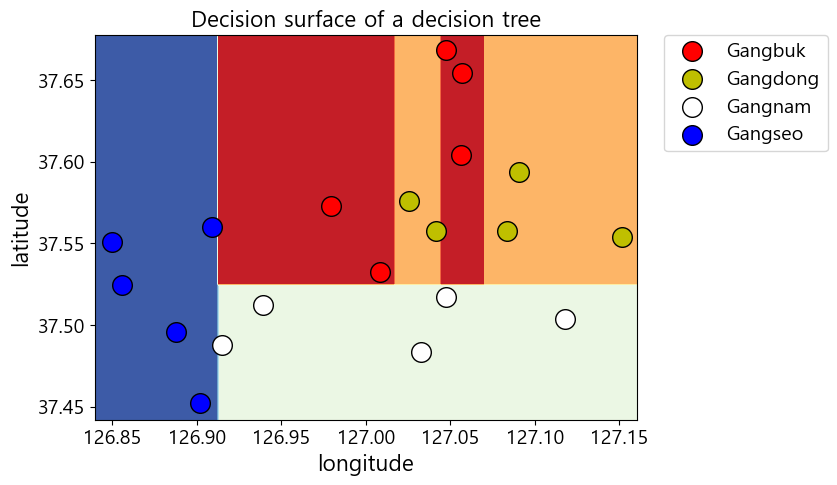

In [97]:
from sklearn import preprocessing, tree

le = preprocessing.LabelEncoder()
y_encoded = le.fit_transform(y_train)

clf = tree.DecisionTreeClassifier(random_state = 35).fit(X_train, y_encoded) # 모델
display_decision_surface(clf, X_train, y_encoded) # 모델, 학습할 데이터, 

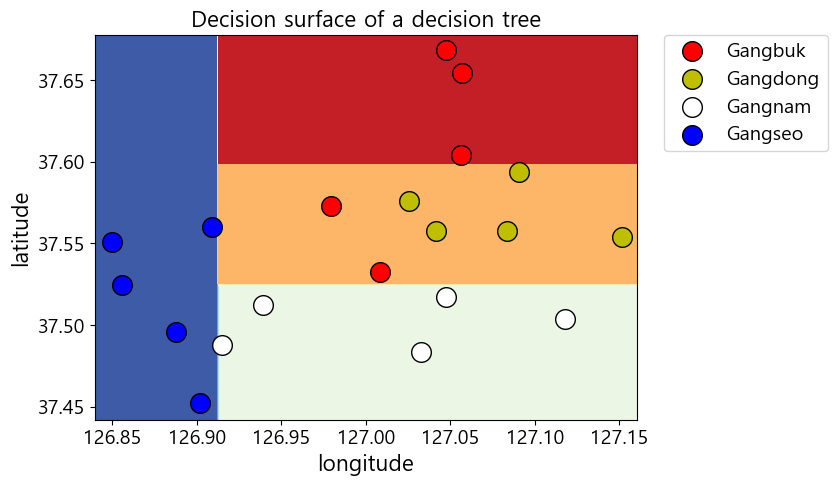

In [98]:
clf = tree.DecisionTreeClassifier(max_depth = 3,
                                  min_samples_split = 3,
                                  min_samples_leaf = 3,
                                  random_state = 5).fit(X_train, y_encoded.ravel())

display_decision_surface(clf, X_train, y_encoded)

# Decision Tree Regression

In [99]:
from sklearn.datasets import fetch_openml
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor

bostion = fetch_openml(name = 'Boston', version = 1, as_frame = True)

In [101]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(boston.data,
                                                                    bostion.target, test_size = 0.3, random_state = 42)

In [103]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [104]:
model.predict(X_test)

array([21.6, 33.1, 13.3, 24.8, 19.4, 18.5, 22.4, 14.3, 23. , 21.2, 18.8,
       27.1,  5.6, 20.1, 19.3, 25. , 15.2,  7.4, 50. , 16.7, 25. , 23.1,
       15.2, 23.8, 13.8, 14.4, 22. , 13.4, 21.7, 20. , 18.8, 23.1, 10.4,
       21.9, 15.2, 15.6, 33.1, 18.7, 20.4, 24.1, 19.8, 28.4, 50. , 17.1,
       21.6, 13.8, 15.2, 24.8, 19.8, 33.1, 23.4, 33.4, 19.4, 28.4, 50. ,
       19.5, 18. , 22.8, 21.6, 22.5, 24.8, 32.9, 29.4, 18.6, 26.6, 14.4,
       15.4, 22.9, 22.8, 13.4, 22.6, 28.7, 10.5, 23.7, 20.1,  5. , 19.8,
       44. , 13.3,  8.1, 21.7, 11.9, 18.5, 10.5, 20.3, 29.9, 17.4, 23.1,
       23.1, 18. , 22.6,  5.6, 19.6, 18.6, 24.4, 19.2, 50. , 13.8, 16.7,
       13.9, 17.5, 24.5, 14.4, 20.4, 19.7, 10.2, 20.4, 24.8, 17.5, 21.9,
       10.5, 13.9, 22.2, 29.6, 31.7, 17.4, 43.1, 19. , 21.2, 23.7, 17.1,
       25. ,  5.6, 19.3, 24.7, 23.1, 23.2, 37.2, 21.4, 46. , 15.4, 24.7,
       18.6, 16. , 13.1, 20.2, 17.5, 30.5, 29.8, 16. , 20.4, 23.5, 18.7,
       17.7,  5.6, 18.5, 15.6,  8.5, 16.7, 44.8, 19

In [105]:
model.score(X_test, y_test)

0.8549592641647423